# Monte Carlo Portfolio Optimization

This notebook handles data acquisition, loading, and analysis for portfolio optimization using Monte Carlo simulations.

## 1. Setup and Configurations

In [7]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set plot style
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Create data directory if it doesn't exist
os.makedirs("../data", exist_ok=True)

## 2. Data Acquisition

Fetching adjusted close prices for selected assets.

In [8]:
tickers = ["AAPL", "MSFT", "GOOGL", "SPY"]

print("Downloading data...")
data = yf.download(
    tickers,
    start="2020-01-01",
    end="2025-12-31",
    auto_adjust=True,
    progress=False
)

# Handle Multi-Index columns if multiple tickers are returned
if isinstance(data.columns, pd.MultiIndex):
    data = data["Close"]

# Reset index so Date becomes a column
data_to_save = data.reset_index()

# Save to CSV
output_path = "../data/asset_prices.csv"
data_to_save.to_csv(output_path, index=False)

print(f"\u2705 Saved: {output_path}")
data.head()

✅ Saved: ../data/asset_prices.csv


Ticker,AAPL,GOOGL,MSFT,SPY
Date,,,,
2020-01-02,72.400520,67.920799,152.505707,297.699036
2020-01-03,71.696640,67.565483,150.606720,295.444733
2020-01-06,72.267944,69.366394,150.996063,296.571869
2020-01-07,71.928062,69.232407,149.619263,295.737976
2020-01-08,73.085106,69.725182,152.002441,297.314148


## 3. Data Loading & Preprocessing

Loading the wide-format dataset and preparing it for analysis.

In [9]:
def load_processed_data(file_path):
    df = pd.read_csv(file_path)
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)
    return df

prices = load_processed_data("../data/asset_prices.csv")
print("Data loaded successfully.")
prices.info()

Data loaded successfully.
<class 'pandas.DataFrame'>
DatetimeIndex: 1507 entries, 2020-01-02 to 2025-12-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1507 non-null   float64
 1   GOOGL   1507 non-null   float64
 2   MSFT    1507 non-null   float64
 3   SPY     1507 non-null   float64
dtypes: float64(4)
memory usage: 58.9 KB


## 4. Basic Analysis & Visualization

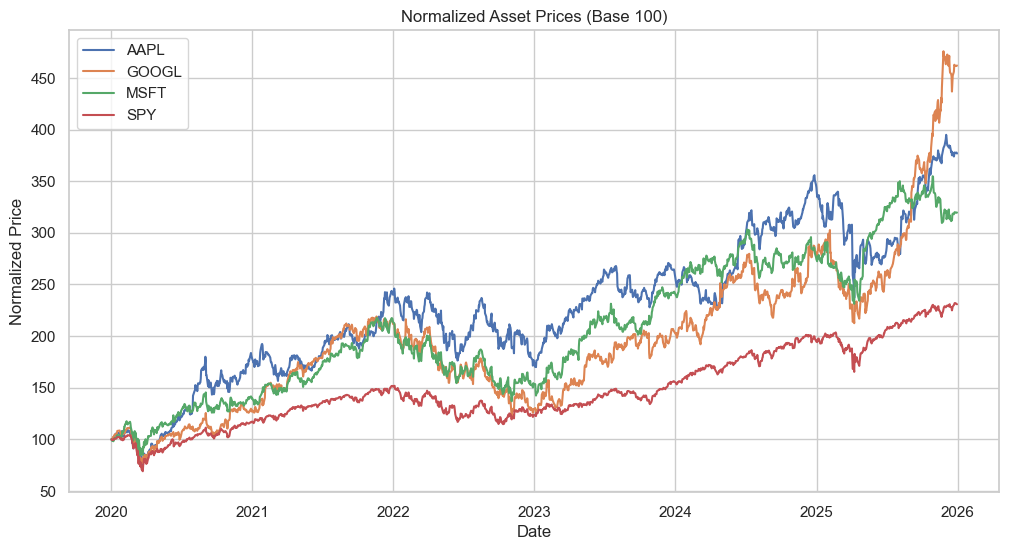

In [10]:
# Normalize prices to start at 100 for comparison
normalized_prices = (prices / prices.iloc[0]) * 100

plt.figure()
for asset in normalized_prices.columns:
    plt.plot(normalized_prices.index, normalized_prices[asset], label=asset)

plt.title("Normalized Asset Prices (Base 100)")
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.legend()
plt.show()

In [11]:
data

Ticker,AAPL,GOOGL,MSFT,SPY
Date,,,,
2020-01-02,72.400520,67.920799,152.505707,297.699036
2020-01-03,71.696640,67.565483,150.606720,295.444733
2020-01-06,72.267944,69.366394,150.996063,296.571869
2020-01-07,71.928062,69.232407,149.619263,295.737976
2020-01-08,73.085106,69.725182,152.002441,297.314148
...,...,...,...,...
2025-12-23,272.105377,314.350006,486.850006,687.960022
2025-12-24,273.554016,314.089996,488.019989,690.380005
2025-12-26,273.144409,313.510010,487.709991,690.309998


## 5. Monte Carlo Simulation Placeholder

Upcoming logic for portfolio simulation.